# Liner Regression Implementation
The objective of this notebook is to get familiarize with  the  problem  of  `Linear Regression`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`
There will be a slope vector with dimension (25,1) initialised with all 0's , and a constant bias value with initialised with 0
a gradient descent function will take these both as input, predict the values, then adjust slope vector and bias accordingly and return adjusted ones. This will go on for the number of times(epochs) mentioned, and at last we get a final slope vector and bias. 

We then predict our final values with these bias and slope vector obtained

In [3]:
# 1.3.1.2
# implement Linear Regression
#data = nxm
#m = mx1
#b = nx1
#y = nx1
def gradientDescent(m_temp,b_temp,x,y,lr):
    
    n,m = np.shape(x)
    y_pred = np.dot(x,m_temp) + b_temp
    y = np.reshape(y,(n,1))
    trans = np.transpose((y-y_pred))
    mG = np.dot(trans,np.dot(-(2/n),x)) 
    #bG = sum(trans)/n
    sm=0
    for i in range(n):
        sm+=trans[0][i]
    bG = -(2/n)*sm
    
    mG = np.transpose(mG)
    mG = m_temp - lr*mG
    bG = b_temp - lr*bG
    
    return mG,bG

def mse(y_test,y_pred):
    sm=0
    for k in range(len(y_test)):
        sm+= y_test[k]-y_pred[k]
    sm = (sm*sm)/len(y_test)
    return sm

In [11]:
epochs = 10000
learning_rate=0.01
rows, cols = np.shape(x_train)
m = np.reshape(np.array([0]*cols),(cols,1))
b = 0 
for i in range(epochs):
    m, b = gradientDescent(m,b,x_train,y_train,learning_rate)

y_pred = np.dot(x_test,m)+b
print(mse(y_test,y_pred))

[0.47096071]


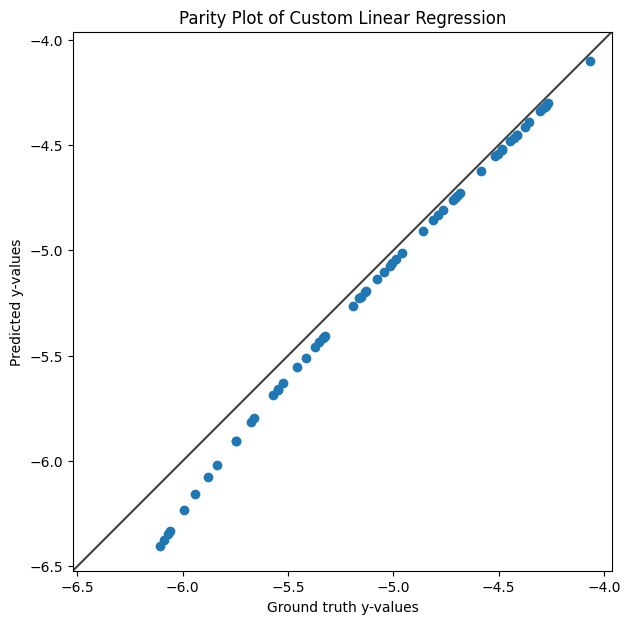

In [12]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

In [13]:
# 1.3.2.3
# try with different learning rates and choose the best one

epochs = 100
rows, cols = np.shape(x_train)
m = np.reshape(np.array([0]*cols),(cols,1))
b = 0 
minimse = float('inf')
finalPred=[]
lrli =[]
mseli=[]
finallr=0
for lr in range(100):
    l = lr/100
    for i in range(epochs):
        m, b = gradientDescent(m,b,x_train,y_train,l)
    y_pred = np.dot(x_test,m)+b
    mseval = mse(y_test,y_pred)
    mseli.append(mseval)
    lrli.append(l)
    
    if minimse>mseval:
        minimse = mseval
        finalPred = y_pred
        finallr=l
print("Best learning rate: "+str(finallr))
print("min mse : "+str(minimse))


/tmp/ipykernel_11082/3294144814.py:30: RuntimeWarning: overflow encountered in multiply
  sm = (sm*sm)/len(y_test)


Best learning rate: 0.42
min mse : [0.00035271]


In [14]:
y_pred = finalPred

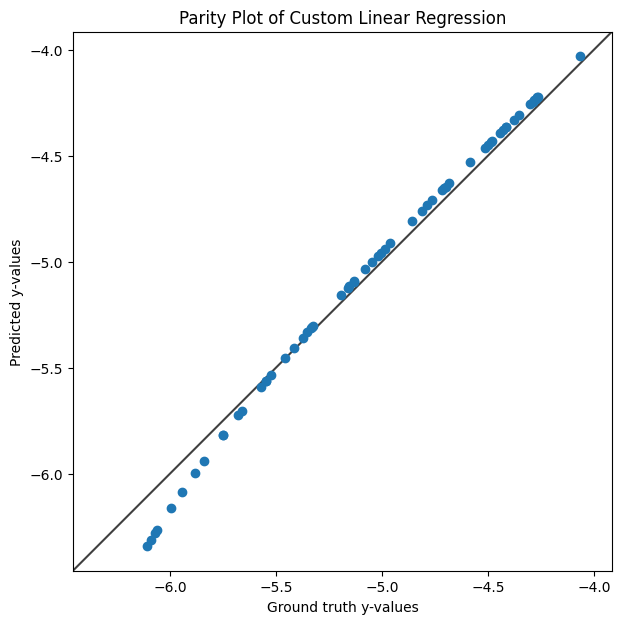

In [15]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`
=> Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. 

In [70]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
import pandas as pd

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
li=[0.01,0.05,0.1,0.5,1,1.5,2,2.5,3,4,5]
d={}
bestPred=[]
bestalpha=0
minimse=float('inf')
for i in li:
    
    ridgeReg = Ridge(alpha=i)

    ridgeReg.fit(x_train,y_train)

    y_pred_ridge = ridgeReg.predict(x_test)

    mse = np.mean((y_pred_ridge - y_test)**2)
    if minimse>mse:
        minimse=mse
        bestPred=y_pred_ridge
        bestalpha=i
    d[i]=mse
alphaTable = pd.DataFrame(d.items(),columns=['aplha','mse'])
print(alphaTable)
print("Best alpha : ",bestalpha)

    aplha       mse
0    0.01  0.094487
1    0.05  0.035474
2    0.10  0.011957
3    0.50  0.003660
4    1.00  0.005023
5    1.50  0.007433
6    2.00  0.011834
7    2.50  0.019701
8    3.00  0.032035
9    4.00  0.071679
10   5.00  0.131059
Best alpha :  0.5


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

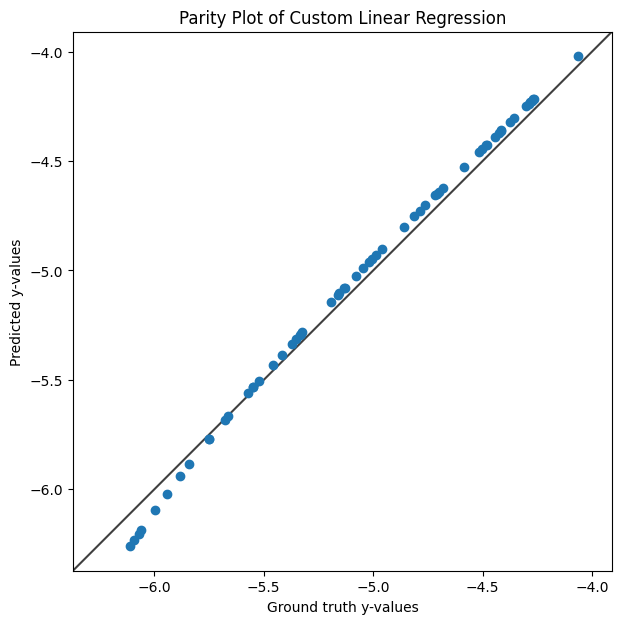

In [64]:
# 1.3.2.4

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, bestPred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

In [73]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

import sklearn
from sklearn.linear_model import Lasso
import pandas as pd

li=[0.01,0.05,0.1,0.3,0.5,0.8,1,1.5,2,2.5,3,4,5]
d={}
bestPred=[]
bestalpha=0
minimse=float('inf')
for i in li:
    
    lassoReg = Lasso(alpha=i)

    lassoReg.fit(x_train,y_train)

    y_pred_lasso = lassoReg.predict(x_test)

    mse = np.mean((y_pred_lasso - y_test)**2)
    if minimse>mse:
        minimse=mse
        bestPred=y_pred_lasso
        bestalpha=i
    d[i]=mse
alphaTable = pd.DataFrame(d.items(),columns=['aplha','mse'])
print(alphaTable)
print("Best alpha : ",bestalpha)

    aplha        mse
0    0.01   0.001799
1    0.05   0.041286
2    0.10   0.171702
3    0.30   1.612258
4    0.50   4.523047
5    0.80  11.645916
6    1.00  18.232286
7    1.50  24.967724
8    2.00  24.967724
9    2.50  24.967724
10   3.00  24.967724
11   4.00  24.967724
12   5.00  24.967724
Best alpha :  0.01


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

α = 0: Same coefficients as simple linear regression
α = ∞: All coefficients zero
0 < α < ∞: coefficients between 0 and that of simple linear regression

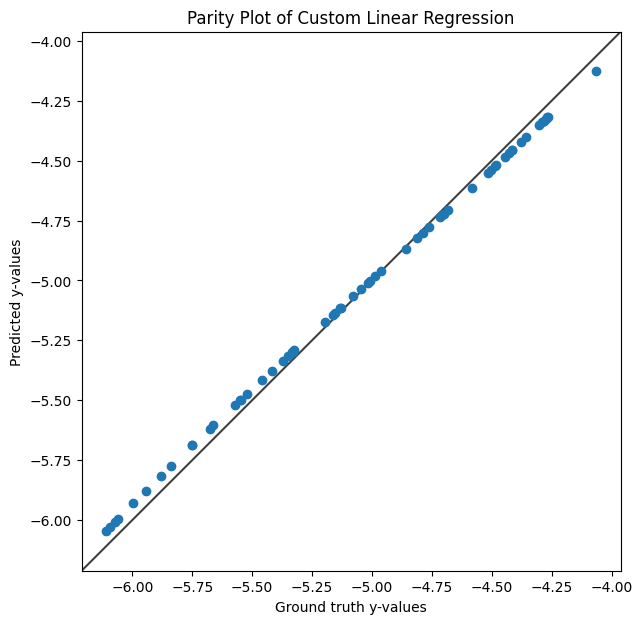

In [74]:
# 1.3.3.4

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, bestPred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()